<a href="https://colab.research.google.com/github/JuniaBS/Bootcamp-Data-Analytics./blob/main/7_Modelos_de_Classifica%C3%A7%C3%A3o_e_Regress%C3%A3o_Log%C3%ADstica__JuniaBSousa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos de Classificação e Regressão Logística


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.datasets import load_digits
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

## 1. Utilizando o dataset iris:


In [ ]:
# Carregar o dataset iris
iris = datasets.load_iris()

# Converter em um DataFrame do pandas
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Adicionar a coluna de species (espécie de flor)
df_iris['species'] = iris.target

In [ ]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Descriçao das colunas:
* sepal length (cm) - comprimento da sépala (cm)
* sepal width(cm) - largura da sépala (cm)
* petal length (cm) - comprimento da pétala (cm)
* petal width (cm) - largura da pétala (cm)
* species - espécie de flor (0 = setosa, 1 = versicolor, 2 = virginica)

A. Faça uma análise inicial sobre esse dataset


In [ ]:
df_iris.shape

(150, 5)

In [ ]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
df_iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

B. Use o boxplot e o histograma para caracterizar as propriedades
de cada uma das espécies existentes.


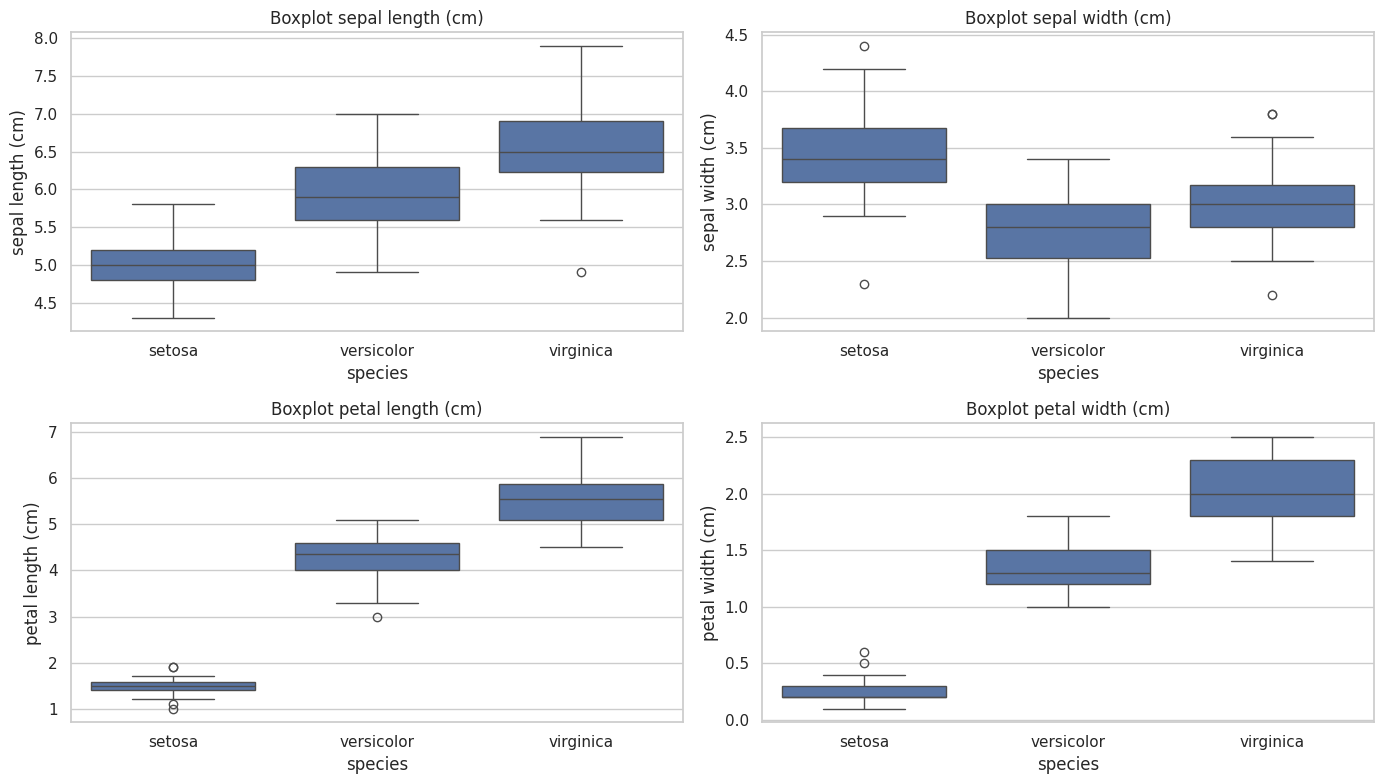

In [ ]:
# Mapear os valores de target para os nomes das espécies
df_iris['species'] = df_iris['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Configurações para melhorar visualizações
sns.set(style="whitegrid")

# Boxplot para cada característica por espécie
plt.figure(figsize=(14, 8))

# Criar um boxplot para cada uma das 4 características
for i, coluna in enumerate(df_iris.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=coluna, data=df_iris)
    plt.title(f'Boxplot {coluna}')
    plt.tight_layout()

plt.show()

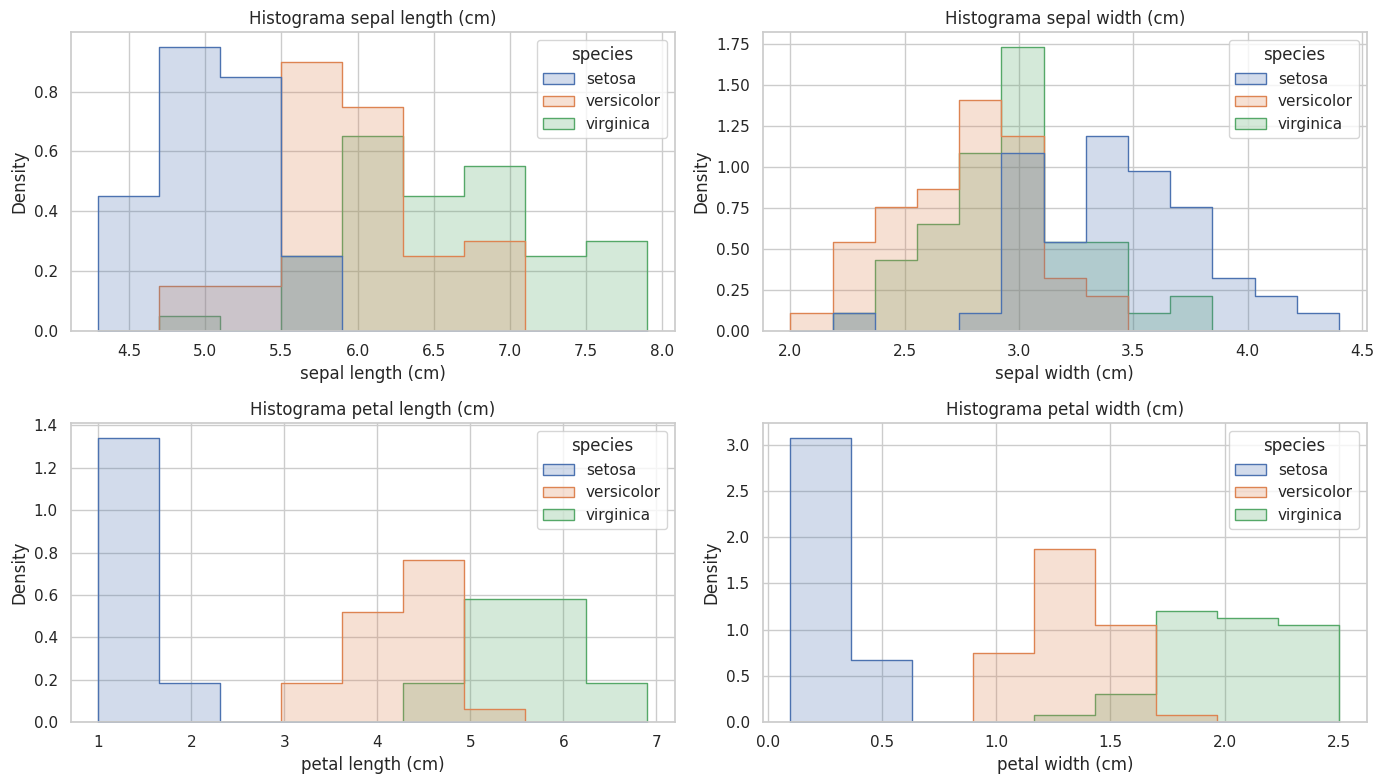

In [ ]:
# Histograma para cada característica por espécie
plt.figure(figsize=(14, 8))

# Criar um histograma para cada uma das 4 características
for i, coluna in enumerate(df_iris.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df_iris, x=coluna, hue="species", element="step", stat="density", common_norm=False)
    plt.title(f'Histograma {coluna}')
    plt.tight_layout()

plt.show()

C. Somente olhando esses gráficos, é possível afirmar que uma ou mais
propriedades (Sepal_Length, Sepal_Width, Petal_Length, Petal_Width) são
suficientes para distinguir as espécies?

Considerando os gráficos de Boxplot e Histograma observamos as propriedades **Petal Length (Comprimento da Pétala)** e **Petal Width (Largura da Pétala)** e percebemos que essas duas características são as mais úteis para distinguir as espécies. No **Boxplot**, há uma separação clara entre **Setosa** e as outras duas espécies (**Versicolor** e **Virginica**), com **Setosa** tendo características muito mais curtas e estreitas. Com relação a **Versicolor** e **Virginica** observamos uma leve sobreposição nas distribuições, mas ainda assim, suas médias e intervalos de valores são variados. Nos **Histogramas**, essa separação é ainda mais evidente e a **Setosa** se destaca como uma classe isolada em relação a essas características, enquanto **Versicolor** e **Virginica** têm uma separação relativamente clara, especialmente para **Petal Length**.

D. Aplique a regressão logística para avaliar o modelo de
classificação.


In [ ]:
# Dividir as variáveis independentes (X) e dependente (y)
X = df_iris.drop('species', axis=1)
y = df_iris['species']

# Dividir o dataset em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar a regressão logística
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
log_reg

LogisticRegression(max_iter=200)

E. Calcule a acurácia, precisão e recall.

In [ ]:
# Fazer previsões no conjunto de teste
y_pred = log_reg.predict(X_test)

# Calcular a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')

Acurácia do modelo: 1.00


In [ ]:
# Calcular a precisão e o recall para cada classe
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f'Precisão (macro): {precision:.2f}')
print(f'Recall (macro): {recall:.2f}')

# Gerar o relatório de classificação completo
print("\nRelatório de Classificação Completo:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Precisão (macro): 1.00
Recall (macro): 1.00

Relatório de Classificação Completo:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



F. Plote a matriz de confusao com matplotlib ou seaborn

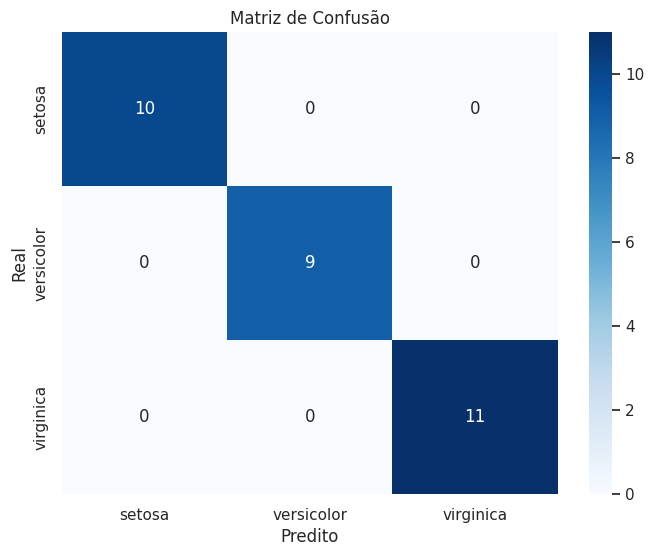

In [ ]:
# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
             xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()


## 2. Utilizando o dataset load_digits. Responda:

In [ ]:
# Carregar o dataset
digits = load_digits()

# Converter em um DataFrame do pandas
df_digits = pd.DataFrame(data=digits.data, columns=digits.feature_names)

In [ ]:
df_digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
df_digits.columns

Index(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4',
       'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1',
       'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6',
       'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3',
       'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0',
       'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
       'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2',
       'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7',
       'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4',
       'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1',
       'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6',
       'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3',
       'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7'],
      dtype='object')

In [ ]:
df_digits.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


A. Faça uma análise inicial sobre esse dataset
* i. Quantos dados possui?
* ii. Existem dados nulos? Se sim quantos?
* iii. Todos são dados numéricos ou existem colunas com dados categóricos?

In [ ]:
df_digits.shape
print(f'O dataset possui {df_digits.shape[0]} linhas e {df_digits.shape[1]} colunas.')

O dataset possui 1797 linhas e 64 colunas.


In [ ]:
# Verificar a quantidade de valores nulos em cada coluna
df_digits.isnull().sum()
print('Não existem valores nulos no dataset.')

Não existem valores nulos no dataset.


In [ ]:
df_digits.info()
print('Todos os dados são numéricos.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

B. Aplique a regressão logística para avaliar o modelo de classificação.



In [ ]:
# Gerar rótulos simulados (0-9) para cada linha do DataFrame
labels_simulados = np.random.randint(0, 10, size=len(df_digits))

# Dividir as variáveis independentes (X) e a variável dependente (y)
X = df_digits
y = labels_simulados

# Dividir o dataset em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar a regressão logística
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
log_reg

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

C. Calcule a acurácia, precisão e recall.


In [ ]:
# Fazer previsões no conjunto de teste
y_pred = log_reg.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)

# Calcular a precisão (precisão macro para cada classe)
precision = precision_score(y_test, y_pred, average='macro')

# Calcular o recall (recall macro para cada classe)
recall = recall_score(y_test, y_pred, average='macro')

# Imprimir as métricas
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)

# Relatório completo de classificação
class_report = classification_report(y_test, y_pred)
print("\nRelatório de Classificação:\n", class_report)

Acurácia: 0.09722222222222222
Precisão: 0.09408268098130357
Recall: 0.09030875476693326

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.11      0.11      0.11        38
           1       0.07      0.06      0.06        33
           2       0.06      0.06      0.06        31
           3       0.04      0.07      0.05        29
           4       0.12      0.09      0.10        33
           5       0.05      0.07      0.06        29
           6       0.18      0.20      0.19        54
           7       0.10      0.08      0.09        39
           8       0.08      0.09      0.09        34
           9       0.12      0.07      0.09        40

    accuracy                           0.10       360
   macro avg       0.09      0.09      0.09       360
weighted avg       0.10      0.10      0.10       360



D. Plote a matriz de confusão com matplotlib ou seaborn

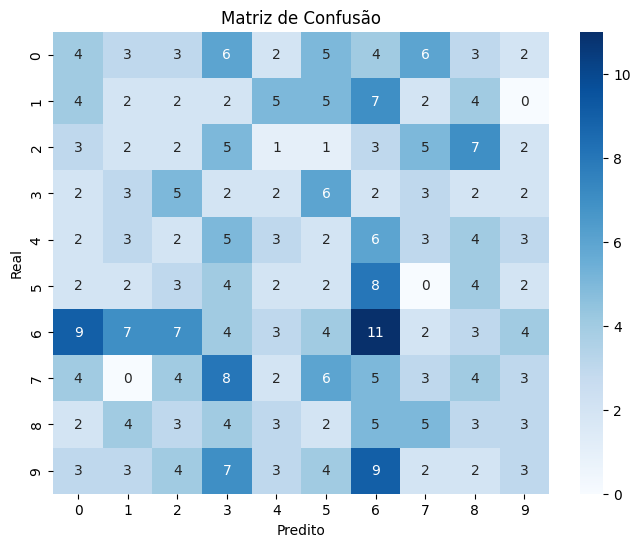

In [ ]:
# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

E. Aplique a regressão logística para avaliar o modelo de classificação dos dígitos de 0-9 que são disponibilizados neste dataset.

In [ ]:
# Gerar rótulos simulados (0-9) para cada linha do DataFrame
labels_simulados = np.random.randint(0, 10, size=len(df_digits))

# Dividir as variáveis independentes (X) e a variável dependente (y)
X = df_digits
y = labels_simulados

# Dividir o dataset em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar a regressão logística
log_reg = LogisticRegression(max_iter=200, solver='lbfgs', multi_class='auto')
log_reg.fit(X_train, y_train)
log_reg

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, multi_class='auto')

F. Calcule a acurácia, precisão e recall.

In [ ]:
# Fazer previsões no conjunto de teste
y_pred = log_reg.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

# Exibir as métricas de avaliação
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)

# Relatório completo de classificação
class_report = classification_report(y_test, y_pred)
print("\nRelatório de Classificação:\n", class_report)

Acurácia: 0.09444444444444444
Precisão: 0.08948504830427027
Recall: 0.09164286017926059

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.08      0.06      0.07        32
           1       0.18      0.16      0.17        45
           2       0.13      0.17      0.15        35
           3       0.07      0.05      0.06        43
           4       0.00      0.00      0.00        34
           5       0.16      0.14      0.15        43
           6       0.05      0.09      0.07        23
           7       0.07      0.08      0.07        36
           8       0.09      0.11      0.10        37
           9       0.06      0.06      0.06        32

    accuracy                           0.09       360
   macro avg       0.09      0.09      0.09       360
weighted avg       0.10      0.09      0.09       360



G. Plote a matriz de confusao com matplotlib ou seaborn

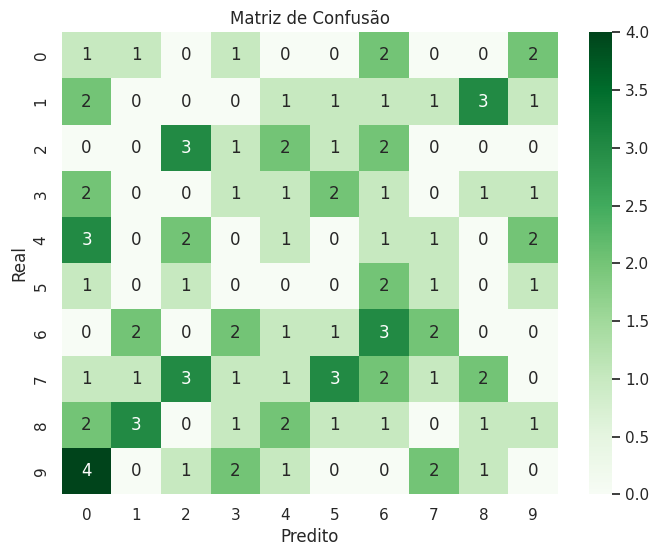

In [ ]:
# Simulando dados de verdadeiros e preditos para fins de plot
np.random.seed(42)
y_test_simulated = np.random.randint(0, 10, size=100)
y_pred_simulated = np.random.randint(0, 10, size=100)

# Calculando a matriz de confusão
conf_matrix = confusion_matrix(y_test_simulated, y_pred_simulated)

# Plotando a matriz de confusão com seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()